# Import necessary libraries

In [2]:
import os
import cv2
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

# Reading in the images

In [3]:
base_dir = '/Users/arthurchong/Desktop/Year 2/IT1244/Dataset/Image Dataset/Brain_Tumor/data/benign'

In [3]:
# os.listdir(base_dir)

In [4]:
img = cv2.imread(os.path.join(base_dir,'No19.jpg.jpg'))

In [5]:
len(img.shape) 

3

In [1]:
# os.listdir(os.path.join('data','benign'))

In [19]:
# for images in os.listdir(os.path.join('data','malignant')):
#     img_path = os.path.join('data','malignant',images) 
#     img = cv2.imread(img_path)
#     try:
#         print(img.shape)
#     except:
#         print('error')


In [5]:
import tensorflow as tf

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) ##Limit GPU memory usage

# Creating a batch of images

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data',color_mode='rgb')

Found 231 files belonging to 2 classes.


2023-09-26 23:01:28.826008: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-09-26 23:01:28.826053: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-26 23:01:28.826057: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-26 23:01:28.826147: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-26 23:01:28.826418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

In [10]:
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

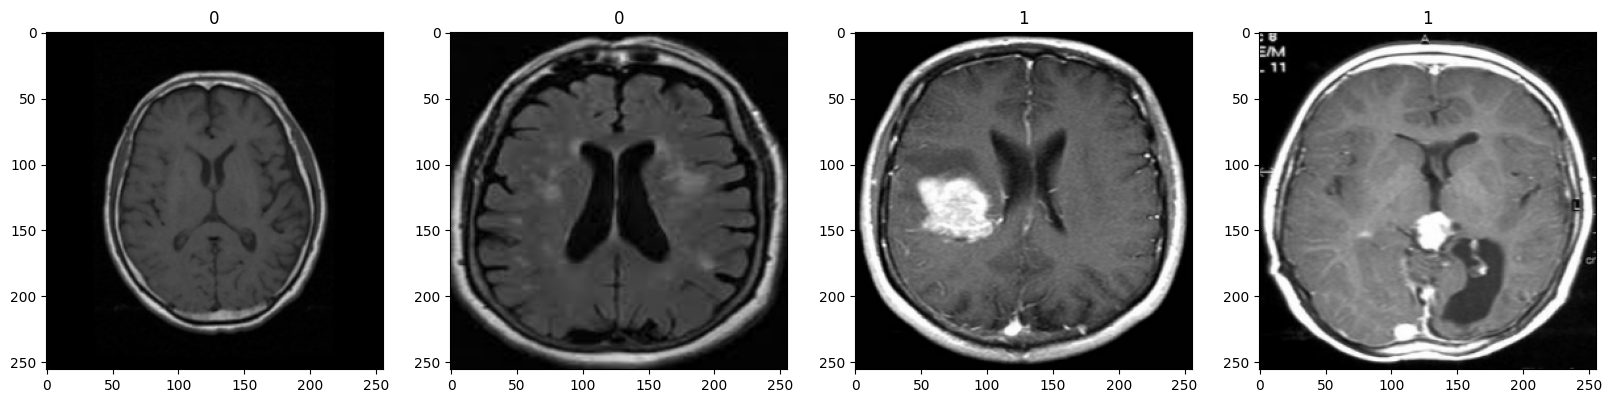

In [49]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y : (x/255,y))

In [20]:
data.as_numpy_iterator().next()[0].min()

0.0

In [21]:
len(data)

8

# Splitting the data into train, validation and split

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2+ 1)
test_size = int(len(data)*.1 + 1)


In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Training the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [25]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation = 'relu',))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),activation = 'relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

# Fitting the model

In [26]:
results = model.fit(train, epochs = 20,validation_data=val)

Epoch 1/20


2023-09-26 23:03:49.474739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 148ms/step - loss: 1.2277 - accuracy: 0.6813 - val_loss: 0.5792 - val_accuracy: 0.7344
Epoch 2/20


2023-09-26 23:03:50.466135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 113ms/step - loss: 0.7968 - accuracy: 0.5000 - val_loss: 0.8390 - val_accuracy: 0.3125
Epoch 3/20
5/5 [==============================] - 1s 105ms/step - loss: 0.6788 - accuracy: 0.5813 - val_loss: 0.6011 - val_accuracy: 0.8125
Epoch 4/20
5/5 [==============================] - 1s 108ms/step - loss: 0.6103 - accuracy: 0.7563 - val_loss: 0.5457 - val_accuracy: 0.7969
Epoch 5/20
5/5 [==============================] - 1s 106ms/step - loss: 0.5212 - accuracy: 0.7688 - val_loss: 0.5226 - val_accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 1s 110ms/step - loss: 0.5210 - accuracy: 0.7438 - val_loss: 0.4773 - val_accuracy: 0.7344
Epoch 7/20
5/5 [==============================] - 1s 106ms/step - loss: 0.4832 - accuracy: 0.7500 - val_loss: 0.4047 - val_accuracy: 0.8438
Epoch 8/20
5/5 [==============================] - 1s 113ms/step - loss: 0.3986 - accuracy: 0.8562 - val_loss: 0.3646 - val_accuracy: 0.8594
Epoch 9/20
5/5 [===============

# Visualising model results

In [29]:
result = pd.DataFrame(results.history)

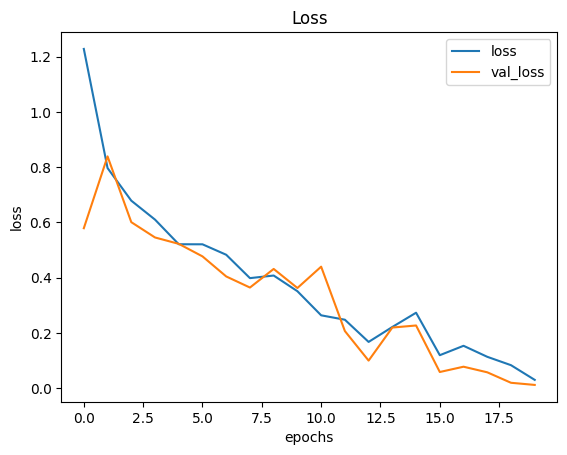

In [32]:
result[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

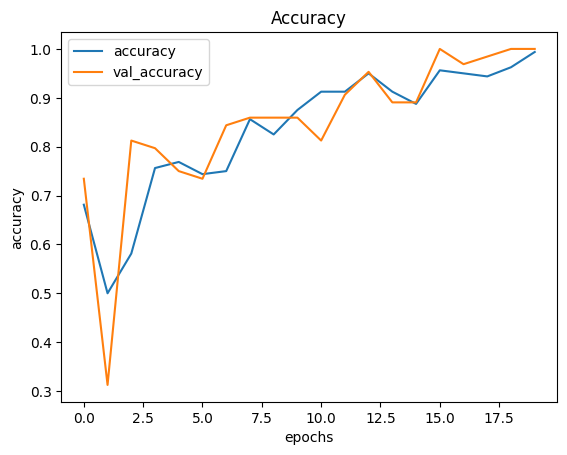

In [33]:
result[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# Evaluating model performance

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [43]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 58ms/step


In [47]:
print (f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0
